In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df = df.iloc[:,1:]

In [7]:
df

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
145,3.0,5.2,2.3,Iris-virginica
146,2.5,5.0,1.9,Iris-virginica
147,3.0,5.2,2.0,Iris-virginica
148,3.4,5.4,2.3,Iris-virginica


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(df['Species'])

In [12]:
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [14]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [15]:
df

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

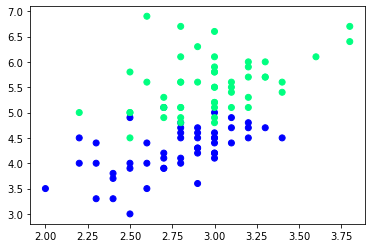

In [16]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [17]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
79,2.6,3.5,1
82,2.7,3.9,1
72,2.5,4.9,1
66,3.0,4.5,1
53,2.3,4.0,1
81,2.4,3.7,1
97,2.9,4.3,1
71,2.8,4.0,1
98,2.5,3.0,1


In [18]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [19]:
df_train

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
91,3.0,4.6,1
143,3.2,5.9,2
108,2.5,5.8,2
100,3.3,6.0,2
130,2.8,6.1,2
125,3.2,6.0,2
59,2.7,3.9,1
81,2.4,3.7,1
68,2.2,4.5,1


In [20]:
df_val

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
107,2.9,6.3,2
115,3.2,5.3,2
87,2.3,4.4,1
134,2.6,5.6,2


In [21]:
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
101,2.7,5.1,2
92,2.6,4.0,1
67,2.7,4.1,1
103,2.9,5.6,2


In [22]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [23]:
y_test

array([1, 2, 2, 1, 2])

In [24]:
X_test

array([[2.5, 4. ],
       [2.9, 6.3],
       [3.2, 5.3],
       [2.3, 4.4],
       [2.6, 5.6]])

## Case 1 - Bagging

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
143,3.2,5.9,2
108,2.5,5.8,2
59,2.7,3.9,1
81,2.4,3.7,1
91,3.0,4.6,1
59,2.7,3.9,1
125,3.2,6.0,2


In [29]:
pip install mlxtend 

  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [31]:
dt_bag1 = DecisionTreeClassifier()

In [33]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

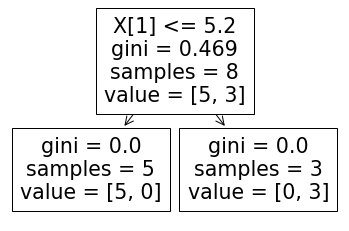

1.0


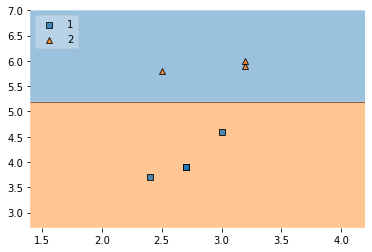

In [34]:
evaluate(dt_bag1,X,y)

In [37]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
143,3.2,5.9,2
108,2.5,5.8,2
68,2.2,4.5,1
124,3.3,5.7,2
68,2.2,4.5,1
125,3.2,6.0,2
108,2.5,5.8,2
59,2.7,3.9,1


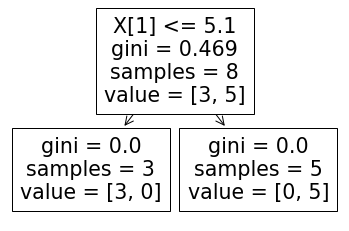

1.0


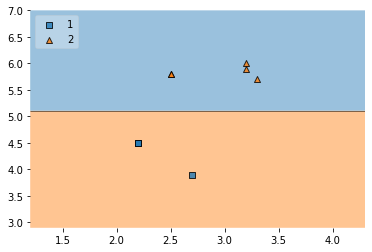

In [38]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [39]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
130,2.8,6.1,2
125,3.2,6.0,2
68,2.2,4.5,1
130,2.8,6.1,2
124,3.3,5.7,2
130,2.8,6.1,2
81,2.4,3.7,1


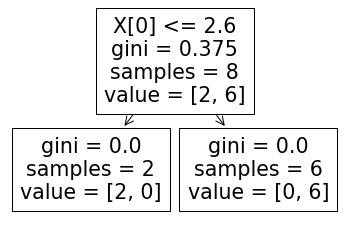

0.8


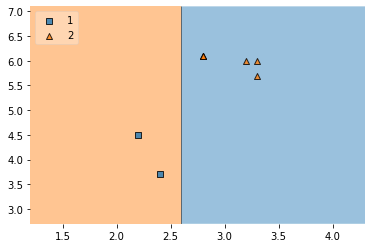

In [40]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [41]:
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
101,2.7,5.1,2
92,2.6,4.0,1
67,2.7,4.1,1
103,2.9,5.6,2


In [42]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


## Pasting

In [43]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
91,3.0,4.6,1
143,3.2,5.9,2
108,2.5,5.8,2
100,3.3,6.0,2
130,2.8,6.1,2
125,3.2,6.0,2
59,2.7,3.9,1
81,2.4,3.7,1
68,2.2,4.5,1


In [45]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
91,3.0,4.6,1
81,2.4,3.7,1
100,3.3,6.0,2
125,3.2,6.0,2
124,3.3,5.7,2
130,2.8,6.1,2
143,3.2,5.9,2


## Random Subspaces

In [46]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [47]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
107,108,7.3,2.9,6.3,1.8,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
23,24,5.1,3.3,1.7,0.5,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor


In [54]:
df1.sample(8,replace=True).sample(2,axis=1)

,SepalWidthCm,Species
23,3.3,Iris-setosa
76,2.8,Iris-versicolor
129,3.0,Iris-virginica
107,2.9,Iris-virginica
90,2.6,Iris-versicolor
55,2.8,Iris-versicolor
107,2.9,Iris-virginica
61,3.0,Iris-versicolor


## Random Patches

In [52]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
107,108,7.3,2.9,6.3,1.8,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
23,24,5.1,3.3,1.7,0.5,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor


In [53]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,Id
55,2.8,56
90,2.6,91
76,2.8,77
107,2.9,108
23,3.3,24
23,3.3,24
76,2.8,77
61,3.0,62
